In [2]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays

# Load and display LiDAR raster

The LiDAR raster files are located in the `data` folder. The rasters are in single band `TIFF` image format.

In [3]:
data_dir = Path('data')
list(data_dir.glob('*.tif'))

[PosixPath('data/dsm_vox_50cm_tile_-11_0.tif'),
 PosixPath('data/dsm_vox_50cm_tile_-7_1.tif'),
 PosixPath('data/dsm_vox_50cm_tile_-12_0.tif')]

## 1. Load and display a raster file

- Open the raster file and read the 2D array (tip: you can type `?function` to display docstrings, e.g. `?rio.open` )
- Read the 2D array
- Display the 2D array as an image
    + what can we do to visualize more details?

Text(0.5, 1.0, 'hillshades')

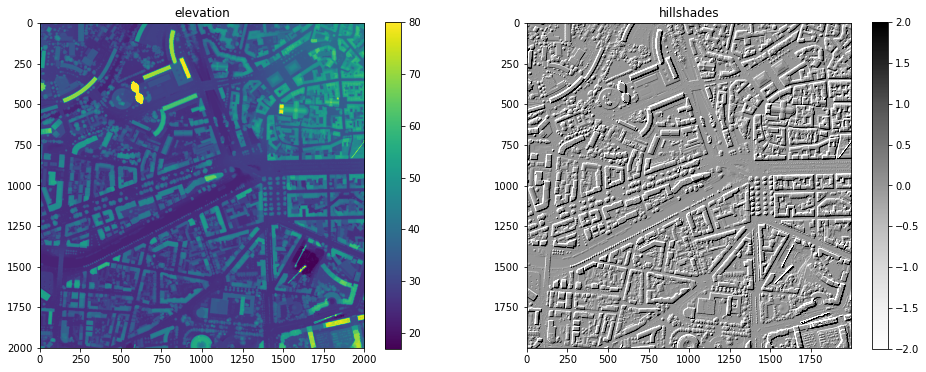

In [4]:
# Your turn!

plt.figure(figsize=(16,6))

src = rio.open('data/dsm_vox_50cm_tile_-12_0.tif')
dsm = src.read()[0]

hillshades = dsm[:-1,:-1] - dsm[1:,1:]

plt.subplot(1,2,1)
plt.imshow(dsm, vmax=80)
plt.colorbar()
plt.title('elevation')

plt.subplot(1,2,2)
plt.imshow(hillshades, vmin=-2, vmax=2, cmap=plt.cm.Greys)
plt.colorbar()
plt.title('hillshades')


## 2. Visualize flat zones in the DSM

- Find the values of the flat zones
    + Sort the unique values in a list (or an array) of levels
- Display some flat zones
    + Display the flatzones of $i^{th}$ level

In [5]:
np.unique(dsm)

array([ 16.93000031,  16.93088722,  16.9309864 , ..., 118.41500092,
       118.41999817, 118.43000031])

638119


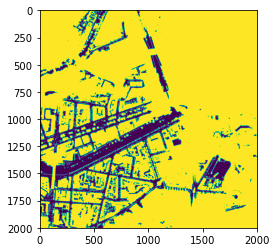

In [6]:
# Your turn!
levels = np.unique(dsm)
print(levels.size)

plt.figure()

def display(i):
    plt.imshow(dsm > levels[i])

display(100000)

In [7]:
import ipywidgets as ipw

ipw.interact(display, i=ipw.IntSlider(0, 0, levels.size - 1))

interactive(children=(IntSlider(value=0, description='i', max=638118), Output()), _dom_classes=('widget-intera…

<function __main__.display(i)>

## 3. Create a max-tree of the DSM

Building a max-tree from scratch is a challenging assignement 🙂

In [7]:
# If you have time, you can start work on a max-tree algorithm 